In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


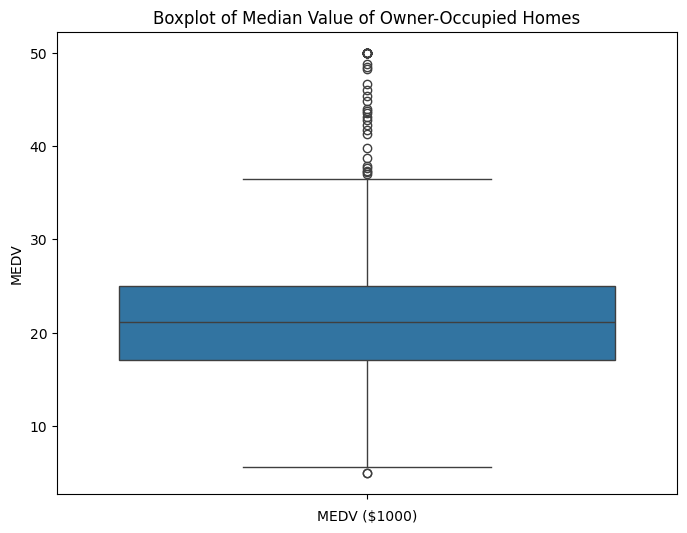

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for MEDV
plt.figure(figsize=(8,6))
sns.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('MEDV ($1000)')
plt.show()


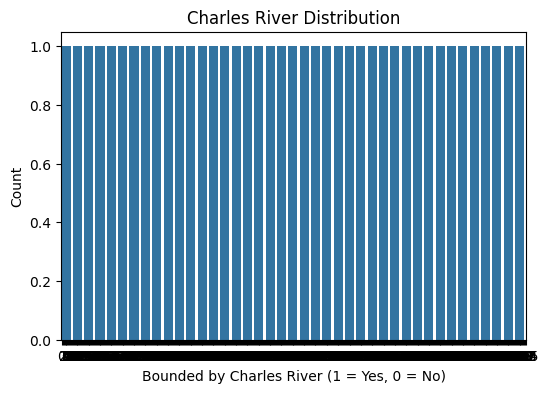

In [11]:
# Bar plot for CHAS
plt.figure(figsize=(6,4))
sns.countplot(boston_df['CHAS'])
plt.title('Charles River Distribution')
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


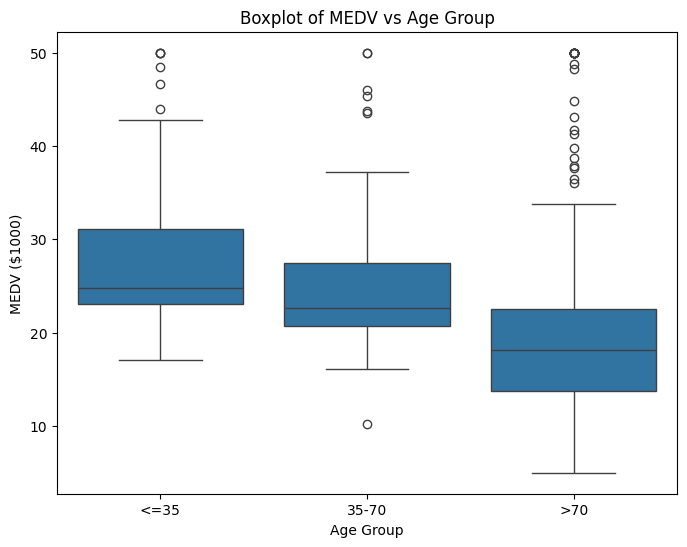

In [15]:
# Discretize AGE into three categories
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

# Boxplot for MEDV vs AGE_group
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000)')
plt.show()


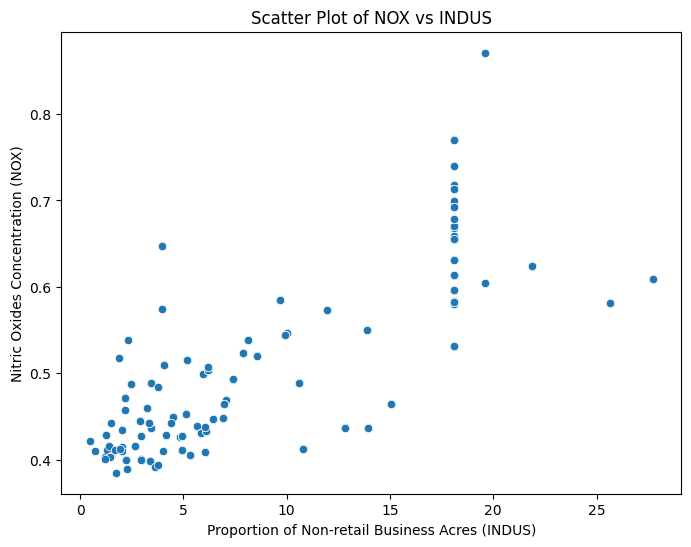

In [16]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()


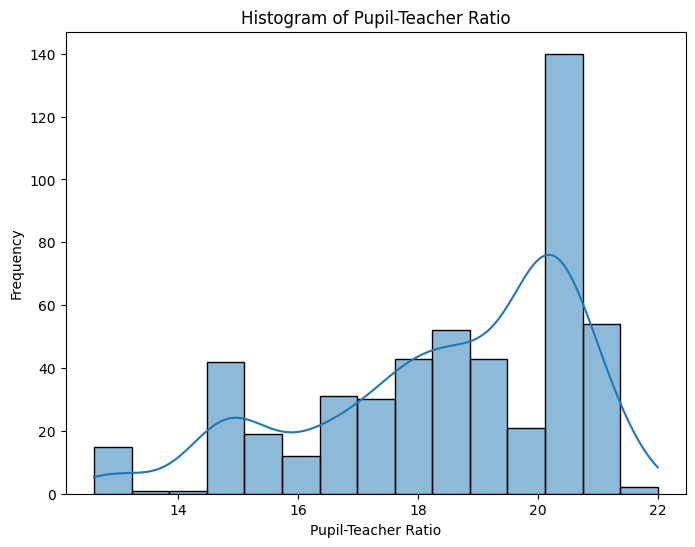

In [17]:
# Histogram for PTRATIO
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [19]:
from scipy import stats

# T-test for MEDV based on CHAS
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05


In [20]:
# ANOVA for MEDV based on AGE_group
anova_result = stats.f_oneway(boston_df[boston_df['AGE_group'] == '<=35']['MEDV'],
                              boston_df[boston_df['AGE_group'] == '35-70']['MEDV'],
                              boston_df[boston_df['AGE_group'] == '>70']['MEDV'])

# Results
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


In [21]:
# Pearson correlation
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Results
print(f"Pearson Correlation: {corr}, P-value: {p_value}")


Pearson Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98


In [22]:
import statsmodels.api as sm

# Define independent (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to the model
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Summary of regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        20:22:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0